Goal: To visualize some of my favourite songs streamed on Spotify from 2013 onwards, and to compare it with today's popular music. 
Exported the Spotify data directly from a web application, Sort Your Music, that extracts song data for a chosen playlist.

Spotify uses the following characteristics or attributes to describe a song: 


EDIT THESE DESCRIPTIONS
* Beats Per Minute (BPM) — The tempo of the song.
* Energy — The energy of a song, the higher the value, the more energetic. 
* Danceability — The higher the value, the easier it is to dance to this song.
* Loudness — The higher the value, the louder the song (in dB).
* Valence — The higher the value, the more positive mood for the song.
* Length — The duration of the song.
* Acousticness — The higher the value the more acoustic the song is.
* Release Year — The year each song was released.
* Popularity — The higher the value the more popular the song is.

In [182]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
df = pd.read_csv("../input/MyTopSongs.csv")
tophits = pd.read_csv("../input/TopHitsApr2020.csv")

print(df.info())
print(tophits.info())
df.head(10)

/kaggle/input/TopHitsApr2020.csv
/kaggle/input/MyTopSongs.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   TITLE     374 non-null    object
 1   ARTIST    374 non-null    object
 2   RELEASE   374 non-null    object
 3   BPM       374 non-null    int64 
 4   ENERGY    374 non-null    int64 
 5   DANCE     374 non-null    int64 
 6   LOUD      374 non-null    int64 
 7   VALENCE   374 non-null    int64 
 8   LENGTH    374 non-null    int64 
 9   ACOUSTIC  374 non-null    int64 
 10  POP.      374 non-null    int64 
dtypes: int64(8), object(3)
memory usage: 32.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   TITLE     50 non-null     object
 1   ARTIST    50 non-null     object
 2   RELEASE   50 non-null  

,TITLE,ARTIST,RELEASE,BPM,ENERGY,DANCE,LOUD,VALENCE,LENGTH,ACOUSTIC,POP.
0,1950,King Princess,2018-02-23,72,54,60,-7,27,225,65,77
1,5:32pm,The Deli,2016-10-17,86,19,69,-14,55,137,69,71
2,7 rings,Ariana Grande,2019-02-08,140,32,78,-11,33,179,59,87
3,Afterglow,Taylor Swift,2019-08-23,111,45,76,-9,40,223,13,71
4,Alexander Hamilton,Leslie Odom Jr.,2015-09-25,132,44,61,-8,56,237,52,70
5,All (feat. Natalie Prass),Cherub,2013-10-11,108,40,89,-7,87,234,70,45
6,All My Worry,Kate York,2016-06-15,119,9,54,-17,34,257,93,31
7,All the Ways - Branchez Remix,Wet,2016-04-02,112,58,70,-7,22,215,11,44
8,All These Years,Camila Cabello,2018-01-12,95,44,73,-7,48,164,61,66
9,Almost Idyllic,Sleeping At Last,2015-06-23,78,11,24,-18,11,136,98,44


Formatting to fix: change the release date to just show the year the song was released

In [183]:
df['YEAR'] = df['RELEASE'].str[:4]
df['YEAR'] = pd.to_numeric(df['YEAR']) # Convert the date type objects into numbers

# Check to make sure all years were successfully extracted.
null_data = df[df.isnull().any(axis=1)]
null_data

df = df.drop('RELEASE', 1)
df

,TITLE,ARTIST,BPM,ENERGY,DANCE,LOUD,VALENCE,LENGTH,ACOUSTIC,POP.,YEAR
0,1950,King Princess,72,54,60,-7,27,225,65,77,2018
1,5:32pm,The Deli,86,19,69,-14,55,137,69,71,2016
2,7 rings,Ariana Grande,140,32,78,-11,33,179,59,87,2019
3,Afterglow,Taylor Swift,111,45,76,-9,40,223,13,71,2019
4,Alexander Hamilton,Leslie Odom Jr.,132,44,61,-8,56,237,52,70,2015
...,...,...,...,...,...,...,...,...,...,...,...
369,Your Shirt,Chelsea Cutler,180,48,43,-7,17,233,19,37,2017
370,Yummy,Justin Bieber,146,51,69,-7,49,210,37,85,2020
371,그렇더라고요 When you love someone,DAY6,140,50,60,-4,60,226,19,58,2017
372,비행운 Contrail,MoonMoon,102,40,84,-6,74,179,83,51,2016


In [184]:
# Complete the same steps for the top song playlist

tophits['YEAR'] = tophits['RELEASE'].str[:4]
tophits['YEAR'] = pd.to_numeric(tophits['YEAR'])


# Check to make sure all years were successfully extracted.
test = tophits[tophits.isnull().any(axis=1)]
test

tophits = tophits.drop('RELEASE', 1)

In [185]:
#df.to_csv('spotify cleaned.csv')
df.describe(include = 'all')

,TITLE,ARTIST,BPM,ENERGY,DANCE,LOUD,VALENCE,LENGTH,ACOUSTIC,POP.,YEAR
count,374,374,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
unique,368,252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Sheep,Ariana Grande,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,118.989305,47.483957,62.045455,-9.098930,44.010695,206.334225,43.633690,50.291444,2014.617647
std,NaN,NaN,30.706077,21.686000,15.444290,4.675915,22.937493,44.427645,33.212889,23.063105,8.104598
min,NaN,NaN,42.000000,1.000000,14.000000,-33.000000,4.000000,54.000000,0.000000,0.000000,1964.000000
25%,NaN,NaN,95.000000,32.000000,51.250000,-10.000000,24.250000,183.000000,12.000000,38.000000,2015.000000
50%,NaN,NaN,114.500000,48.000000,64.000000,-8.000000,43.000000,207.000000,39.500000,54.000000,2017.000000
75%,NaN,NaN,138.000000,64.000000,74.000000,-6.000000,62.000000,229.750000,74.000000,68.000000,2018.000000


Plotting histograms for each of the attributes Spotify uses to describe their music

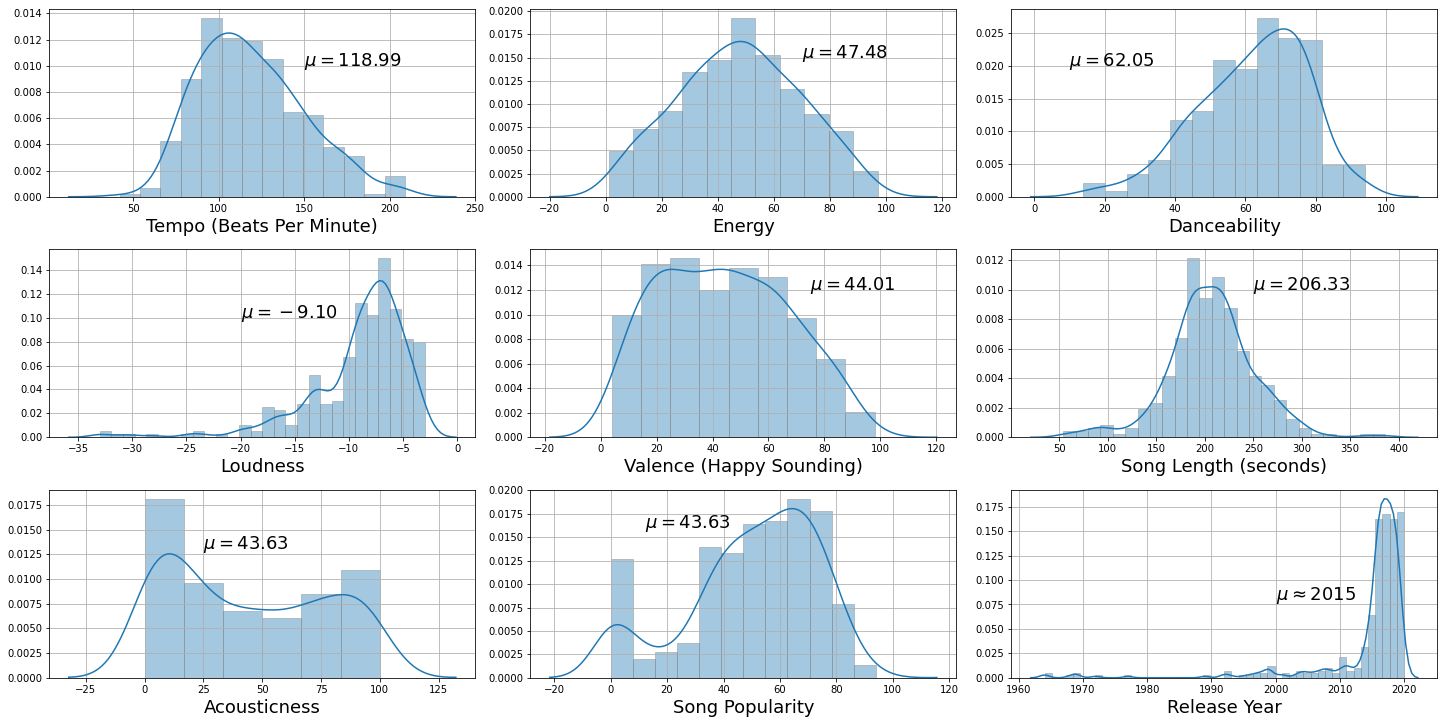

In [186]:
plt.figure(1, figsize=(20, 10),)
hfont = {'fontname':'Century Gothic'}

plt.subplot(331)
sns.distplot(df.BPM, hist_kws={'edgecolor':'grey'})
plt.text(150, .010, r'$\mu = 118.99$', fontsize=18)
plt.xlabel('Tempo (Beats Per Minute)', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(332)
sns.distplot(df.ENERGY, hist_kws={'edgecolor':'grey'})
plt.text(70, .015, r'$\mu = 47.48$', fontsize=18)
plt.xlabel('Energy', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(333)
sns.distplot(df.DANCE, hist_kws={'edgecolor':'grey'})
plt.text(10, .020, r'$\mu = 62.05$', fontsize=18)
plt.xlabel('Danceability', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(334)
sns.distplot(df.LOUD, hist_kws={'edgecolor':'grey'})
plt.text(-20, .10, r'$\mu = -9.10$', fontsize=18)
plt.xlabel('Loudness', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(335)
sns.distplot(df.VALENCE, hist_kws={'edgecolor':'grey'})
plt.text(75, 0.012, r'$\mu = 44.01$', fontsize=18)
plt.xlabel('Valence (Happy Sounding)', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(336)
sns.distplot(df.LENGTH, hist_kws={'edgecolor':'grey'});
plt.text(250, 0.010, r'$\mu = 206.33$', fontsize=18)
plt.xlabel('Song Length (seconds)', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(337)
sns.distplot(df.ACOUSTIC, hist_kws={'edgecolor':'grey'})
plt.text(25, 0.013, r'$\mu = 43.63$', fontsize=18)
plt.xlabel('Acousticness', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(338)
sns.distplot(df['POP.'], hist_kws={'edgecolor':'grey'})
plt.text(12, 0.016, r'$\mu = 43.63$', fontsize=18)
plt.xlabel('Song Popularity', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(339)
sns.distplot(df.YEAR, hist_kws={'edgecolor':'grey'})
plt.text(2000, 0.080, r'$\mu \approx 2015$', fontsize=18)
plt.xlabel('Release Year', fontsize=18, **hfont)
plt.grid(True)

plt.tight_layout(pad=0.5, w_pad=1.0, h_pad=1.0)

In [187]:
# Investigating the songs I have that are from before the 2000's.
df[df['YEAR'] < 2000] 

# Investigating the songs that have short lengths
df[df['LENGTH'] < 100]

,TITLE,ARTIST,BPM,ENERGY,DANCE,LOUD,VALENCE,LENGTH,ACOUSTIC,POP.,YEAR
69,Daylight,AcousticTrench,150,41,57,-13,73,62,5,23,2015
131,I Can't Help,Sarcastic Sounds,164,32,65,-12,32,78,44,62,2018
202,Mia & Sebastian’s Theme,Justin Hurwitz,117,19,48,-16,11,98,98,62,2016
236,Our House by the Waterfall,Rook1e,116,47,76,-9,58,91,90,43,2017
241,Patience,The Lumineers,138,24,48,-17,12,96,97,8,2016
253,Recuérdame (Arrullo),Gael Garcia Bernal,86,13,54,-19,8,70,92,46,2017
260,Save Me,H E R B,159,36,49,-13,35,84,91,59,2017
263,Self,Noname,92,54,81,-7,81,95,86,1,2018
299,Sushi - Interlude,Astrid S,164,45,64,-13,18,85,56,30,2017
329,Throes,Half Moon Run,127,6,34,-24,13,54,99,38,2015


Looking at the data, I am not too surprised of some of the results. For example my average for tempo, 118.99 is not surprising as I have a strong liking for slower songs with mellow rhythms, while still enjoying high energy songs on occasion. I am also not too surprised with the average release year of these songs, as I started using Spotify and accumulating songs into this playlist in 2014. 

I'm curious as to how my listening compares to the most popular songs today. Spotify has a Top Hits playlist of 50 songs that is updated weekly based on the platform's most listened songs. The Top Hits playlist I have downloaded is from the last week of April 2020. Plotting the histograms for both datasets: 

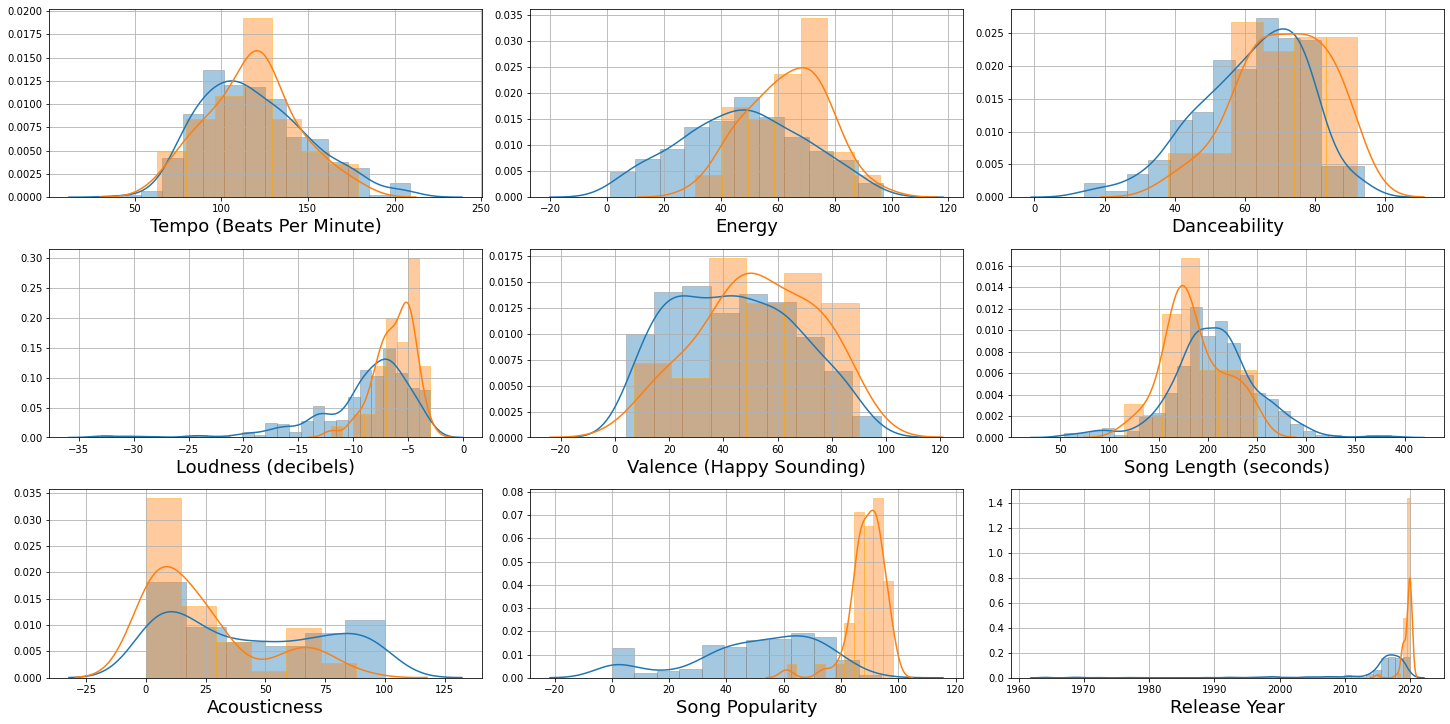

In [188]:
plt.figure(1, figsize=(20, 10),)
hfont = {'fontname':'Century Gothic'}

# using subplot: first digit is the number of rows, the second the number of columns, and the third the index of the subplot
plt.subplot(331)
sns.distplot(df.BPM, hist_kws={'edgecolor':'grey'})
sns.distplot(tophits.BPM, hist_kws={'edgecolor':'orange'})
plt.xlabel('Tempo (Beats Per Minute)', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(332)
sns.distplot(df.ENERGY, hist_kws={'edgecolor':'grey'})
sns.distplot(tophits.ENERGY, hist_kws={'edgecolor':'orange'})
plt.xlabel('Energy', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(333)
sns.distplot(df.DANCE, hist_kws={'edgecolor':'grey'})
sns.distplot(tophits.DANCE, hist_kws={'edgecolor':'orange'})
#plt.text(10, .020, r'$\mu = 62.05$', fontsize=18)
plt.xlabel('Danceability', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(334)
sns.distplot(df.LOUD, hist_kws={'edgecolor':'grey'})
sns.distplot(tophits.LOUD, hist_kws={'edgecolor':'orange'})
#plt.text(-20, .10, r'$\mu = -9.10$', fontsize=18)
plt.xlabel('Loudness (decibels)', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(335)
sns.distplot(df.VALENCE, hist_kws={'edgecolor':'grey'})
sns.distplot(tophits.VALENCE, hist_kws={'edgecolor':'orange'})
#plt.text(75, 0.012, r'$\mu = 44.01$', fontsize=18)
plt.xlabel('Valence (Happy Sounding)', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(336)
sns.distplot(df.LENGTH, hist_kws={'edgecolor':'grey'});
sns.distplot(tophits.LENGTH, hist_kws={'edgecolor':'orange'});
#plt.text(250, 0.010, r'$\mu = 206.33$', fontsize=18)
plt.xlabel('Song Length (seconds)', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(337)
sns.distplot(df.ACOUSTIC, hist_kws={'edgecolor':'grey'})
sns.distplot(tophits.ACOUSTIC, hist_kws={'edgecolor':'orange'})
#plt.text(25, 0.013, r'$\mu = 43.63$', fontsize=18)
plt.xlabel('Acousticness', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(338)
sns.distplot(df['POP.'], hist_kws={'edgecolor':'grey'})
sns.distplot(tophits['POP.'], hist_kws={'edgecolor':'orange'})
#plt.text(12, 0.016, r'$\mu = 43.63$', fontsize=18)
plt.xlabel('Song Popularity', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(339)
sns.distplot(df.YEAR, hist_kws={'edgecolor':'grey'})
sns.distplot(tophits.YEAR, hist_kws={'edgecolor':'orange'})
#plt.text(2000, 0.080, r'$\mu \approx 2015$', fontsize=18)
plt.xlabel('Release Year', fontsize=18, **hfont)
plt.grid(True)

plt.tight_layout(pad=0.5, w_pad=1.0, h_pad=1.0)

Some remarks from comparing my music with the Today's Top Hits playlist. The spike in 2019/2020 from Today's Top Hits makes sense, since the most popular songs at the moment are typically those that are recently released. Similarly, the Top Hits' Song Popularity curve has a tall bump in the high end of song popularity values, which makes sense since this playlist is reflective of the most popular music right now. The higher Energy, Valence, Tempo and Danceability are also characteristic of music that is of Pop and Hip/Hop genres that are often amongst the top hits. The shorter average song length is also characteristic of songs that are more radio friendly.

A relationship that I am interested in looking further into is the relationship between song popularity and danceability and/or energy. Other potential relationships to investigate: loudness, energy and danceability, and acousticness vs energy/loudness. To look at their relationships, we can look at their correlation coefficients matrices.

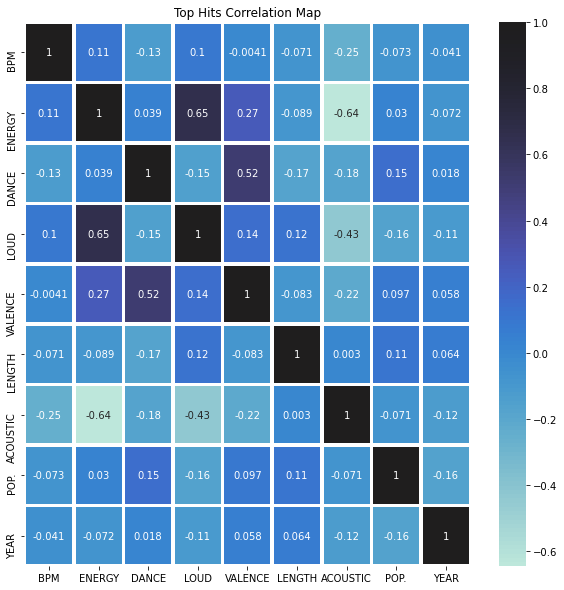

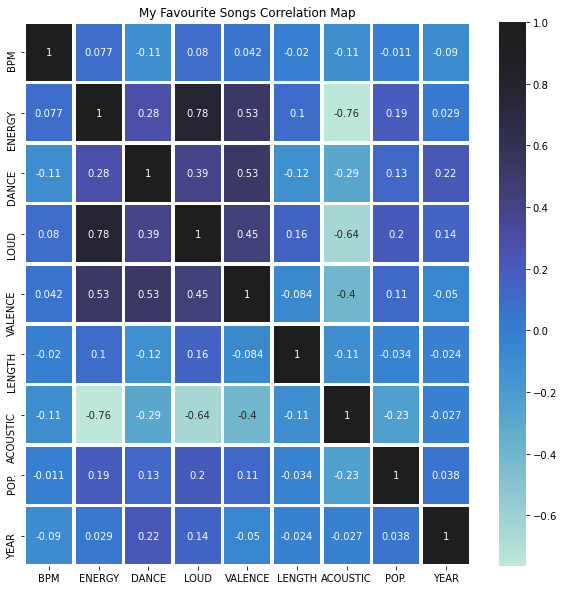

In [189]:
plt.figure(figsize=(10,10))
plt.title('Top Hits Correlation Map')
ax=sns.heatmap(tophits.corr(),
               linewidth=2.5,
               annot=True,
               center=1)

plt.figure(figsize=(10,10))
plt.title('My Favourite Songs Correlation Map')
ax=sns.heatmap(df.corr(),
               linewidth=2.5,
               annot=True,
               center=1)


Looking at the two correlation matrices, there is a noticeable strong positive relationship between Loudness and Energy, and between Valence (happy and positive sounding) and Dance. There is also a strong negative relationships between Acousticness and Energy, meaning high Energy songs have low acousticness. This intuitively makes sense since acoustic songs are generally more relaxing and peaceful sounding. I am surprised that there are no strong relationships between Popularity and any other traits.

In [190]:
# Another way to look at the correlation matrix
#corr_metrics = tophits.corr()
#corr_metrics.style.background_gradient()

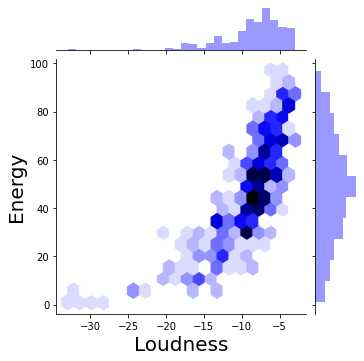

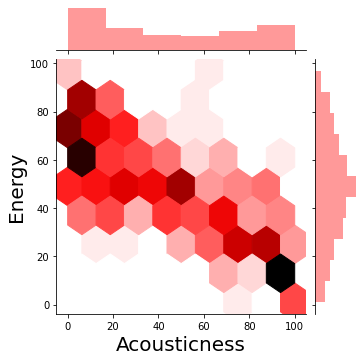

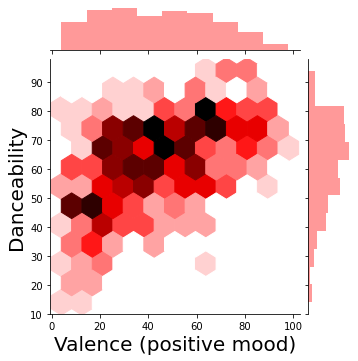

In [191]:
plt.rc("legend", fontsize=30)

sns.jointplot(y=df['ENERGY'], x=df['LOUD'], kind="hex", color="b", height=5).set_axis_labels("Loudness", "Energy", fontsize=20)
sns.jointplot(y=df['ENERGY'], x=df['ACOUSTIC'], kind="hex", color="r", height=5).set_axis_labels("Acousticness", "Energy", fontsize=20)
sns.jointplot(y=df['DANCE'], x=df['VALENCE'], kind="hex", color="r", height=5).set_axis_labels("Valence (positive mood)", "Danceability", fontsize=20)
#sns.jointplot(y=df['ACOUSTIC'], x=df['LOUD'], kind="hex", color="r", height=13).set_axis_labels("Loudness", "Acousticness", fontsize=35)
#sns.jointplot(y=df['ENERGY'], x=df['VALENCE'], kind="hex", color="r", height=13).set_axis_labels("Valence (positive mood)", "Energy", fontsize=35)
#sns.jointplot(y=df['POP.'], x=df['ENERGY'], kind="hex", color="r", height=5).set_axis_labels("Energy", "Popularity", fontsize=15)
#sns.jointplot(y=df['YEAR'], x=df['LOUD'], kind="hex", color="r", height=5).set_axis_labels("Loudness", "Release Year", fontsize=15)

Here we have 9 dimensions of numerical properties: Song Popularity, Danceability, etc. High-dimensional data is difficult to visualize, but we can use the TSNE algorithm to attempt to find a faithful representation of it in a lower dimension, in our case I will be visualizing it in the 2 dimension plane.

In [205]:
x = df.drop(['TITLE','ARTIST'], axis=1) # dropping the non-numerical attributes
from sklearn.manifold import TSNE 
X_embedded = TSNE(n_components = 2, perplexity=5, n_iter=5000).fit_transform(x) # standardizing / centering each song

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44536 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47111 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45908 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_

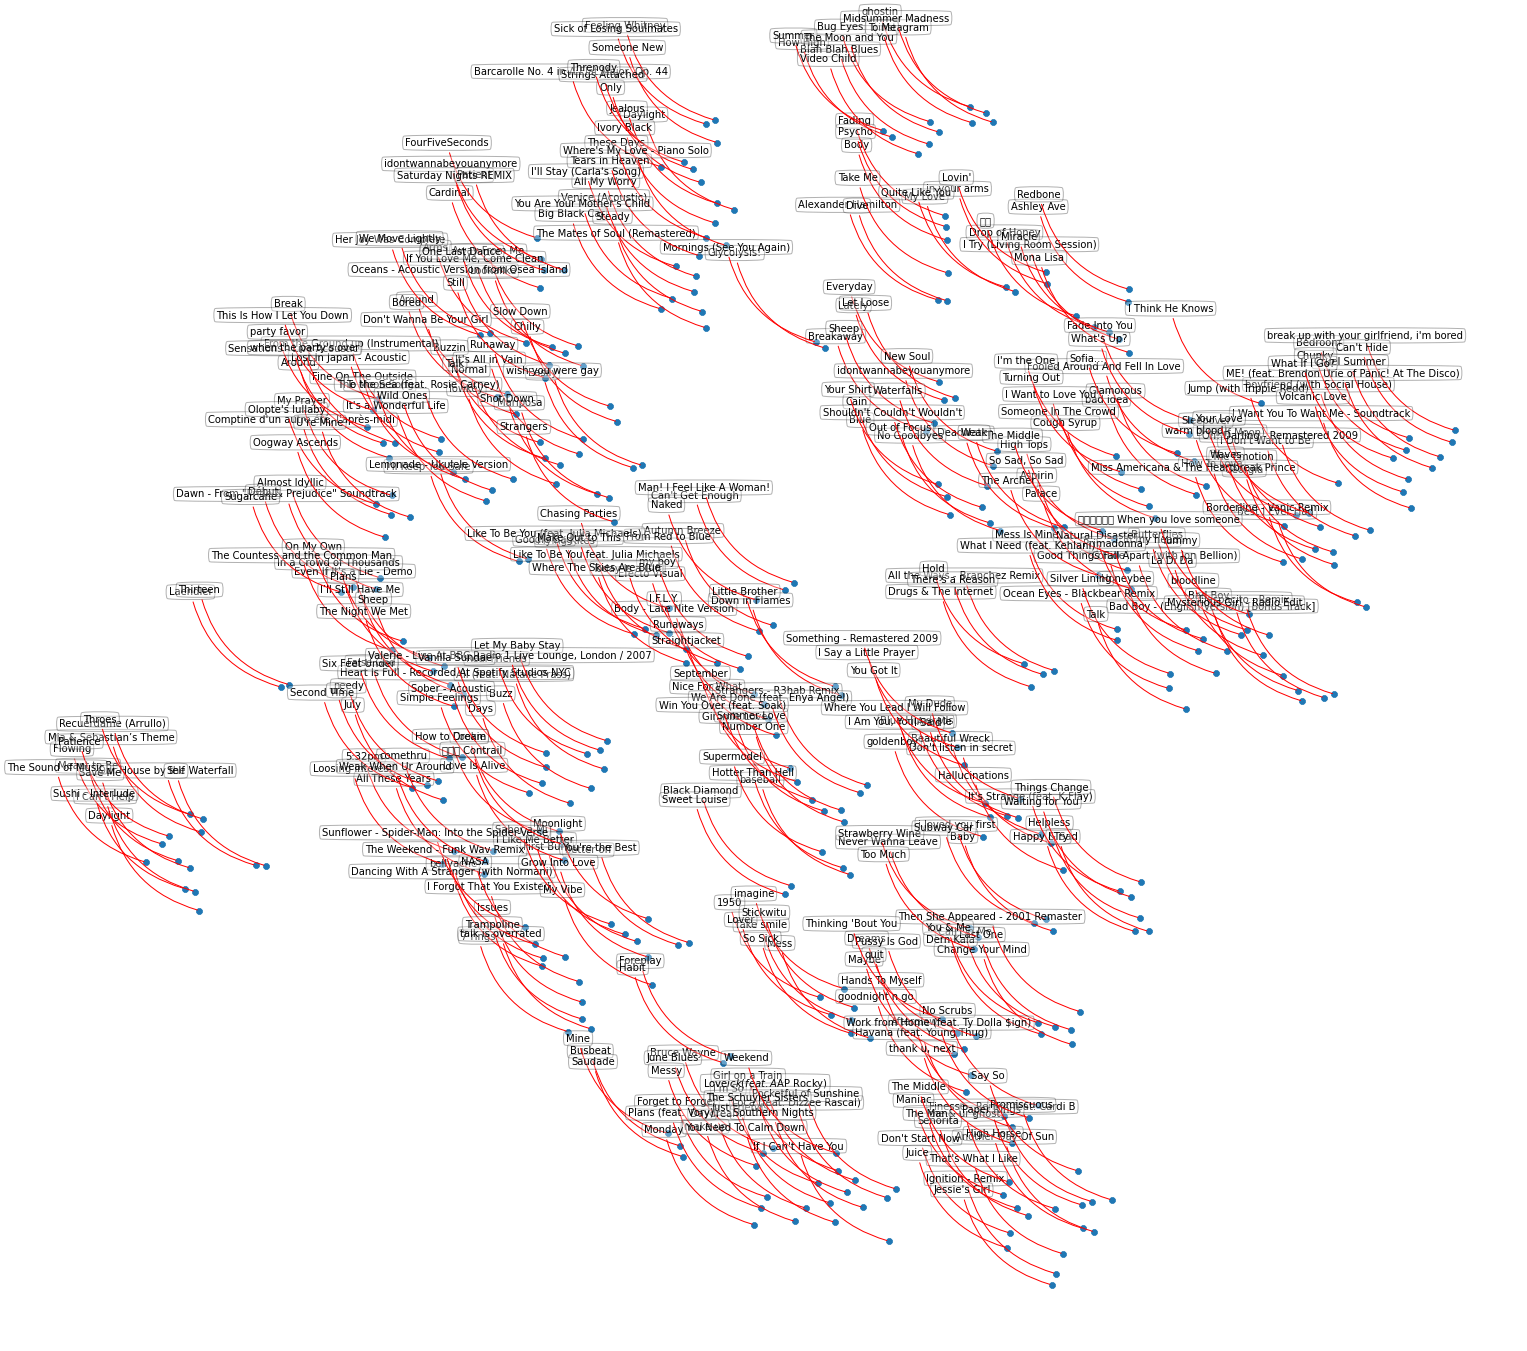

In [206]:
from matplotlib.pyplot import *
fig = figure(figsize=(20, 20))
ax = axes(frameon=False)         # an object, make axis frames invisible
setp(ax, xticks=(), yticks=())       # setting the object properties for ax, xticks and yticks are empty, no tick labels 
subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,wspace=0.0, hspace=0.0) # finetuning the subplot layout
scatter(X_embedded[:, 0], X_embedded[:, 1], marker = "8")  # plotting the transformed t-sne points

for row_id in range(0, len(df)):
   
        target_word = df.TITLE[row_id]
        xx = X_embedded[row_id, 0]
        yy = X_embedded[row_id, 1]
        plt.annotate(target_word, (xx,yy), size=10, xytext=(-90,90), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round4', fc='white', alpha=0.3),
            arrowprops=dict(arrowstyle='-', connectionstyle='arc3,rad=0.3', 
                            color='red'))

Playing with the perplexity value, here using perplexity = 30. Above we had perplexity set to 5.

Perplexity: A second feature of t-SNE is a tuneable parameter, “perplexity,” which says (loosely) how to balance attention between local and global aspects of your data. The parameter is, in a sense, a guess about the number of close neighbors each point has. The perplexity value has a complex effect on the resulting pictures. The original paper says, “The performance of SNE is fairly robust to changes in the perplexity, and typical values are between 5 and 50.” But the story is more nuanced than that. Getting the most from t-SNE may mean analyzing multiple plots with different perplexities.



/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44536 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47111 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45908 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_

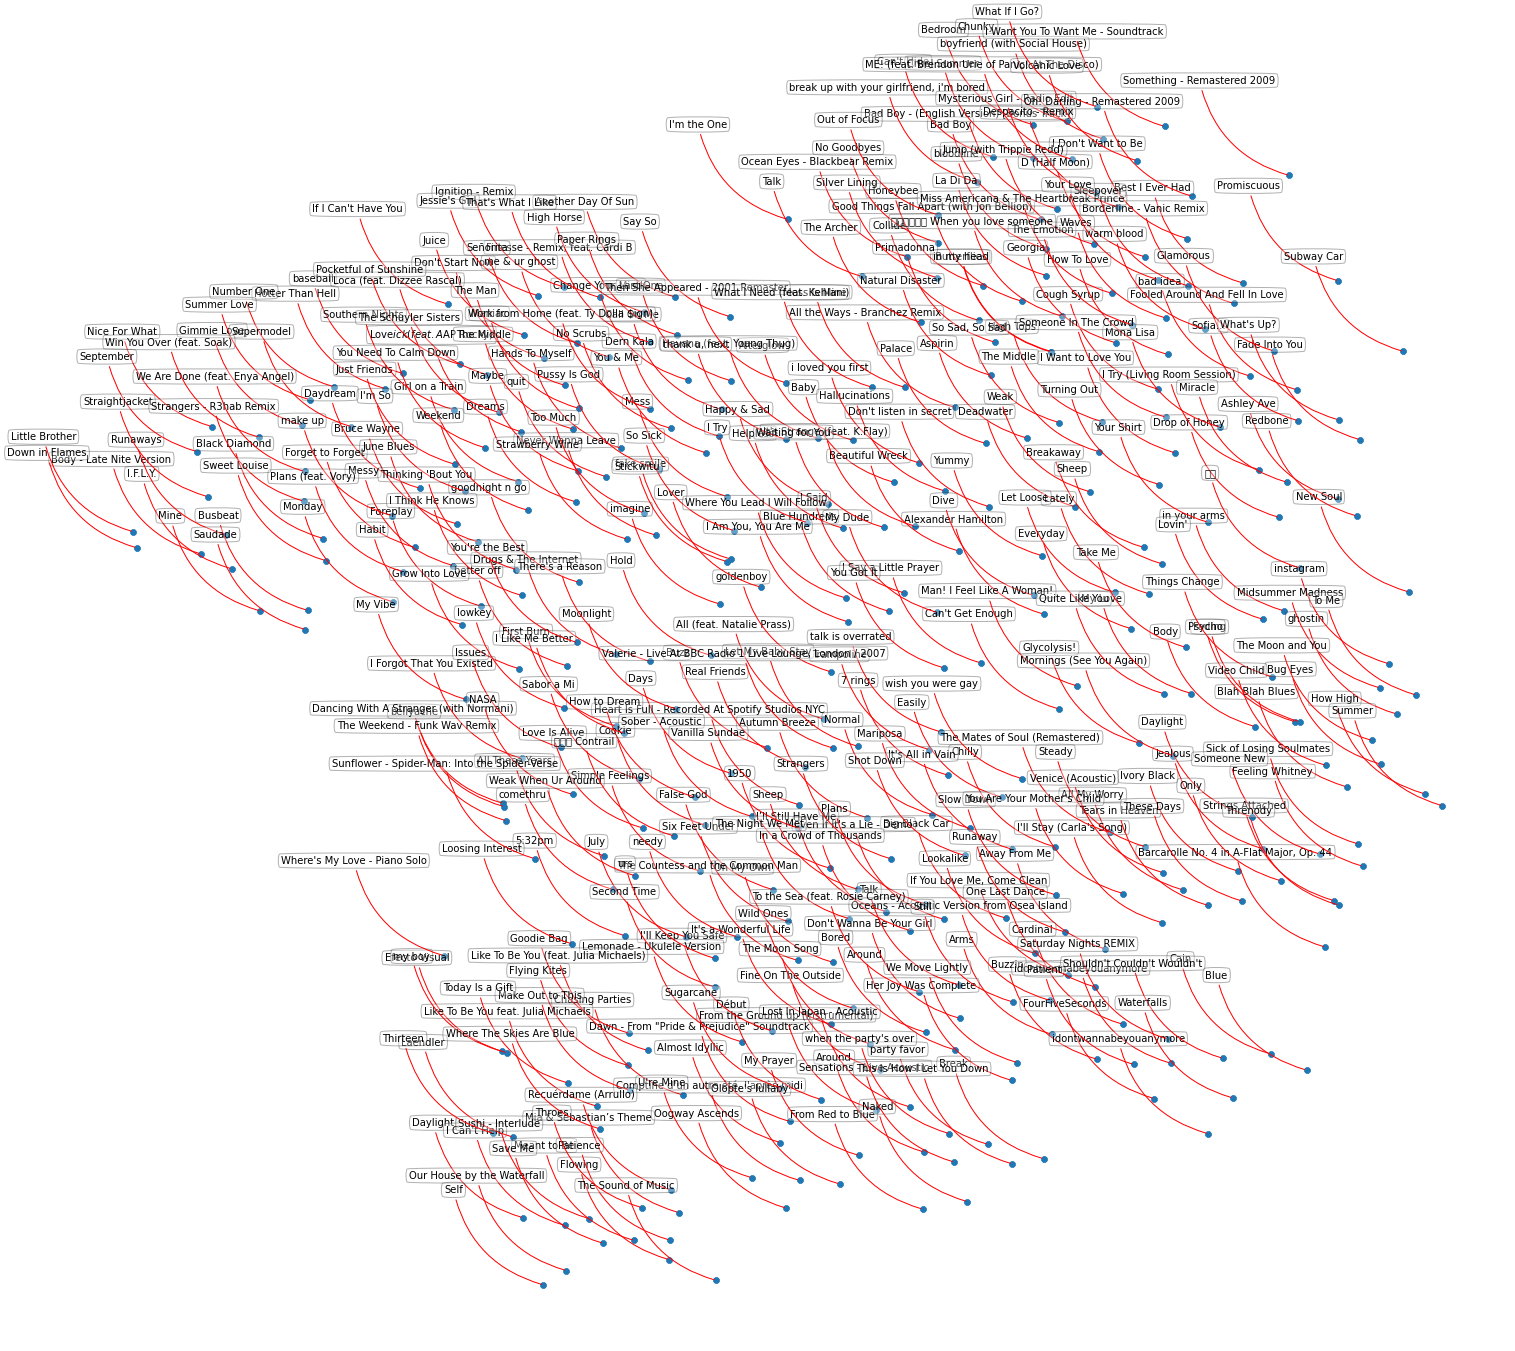

In [207]:
X_embedded = TSNE(n_components = 2, perplexity=30, n_iter=5000).fit_transform(x) 
fig = figure(figsize=(20, 20))
ax = axes(frameon=False)
setp(ax, xticks=(), yticks=())
subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,wspace=0.0, hspace=0.0) 
scatter(X_embedded[:, 0], X_embedded[:, 1], marker = "8") 

for row_id in range(0, len(df)):
        target_word = df.TITLE[row_id]
        xx = X_embedded[row_id, 0]
        yy = X_embedded[row_id, 1]
        plt.annotate(target_word, (xx,yy), size=10, xytext=(-90,90), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round4', fc='white', alpha=0.3),
            arrowprops=dict(arrowstyle='-', connectionstyle='arc3,rad=0.3', 
                            color='red'))

This plot isn't exactly the most interpretive, given its crowded nature and difficulty to read some of the song names. We can try to plot some of the artists I have alot of songs saved for. 

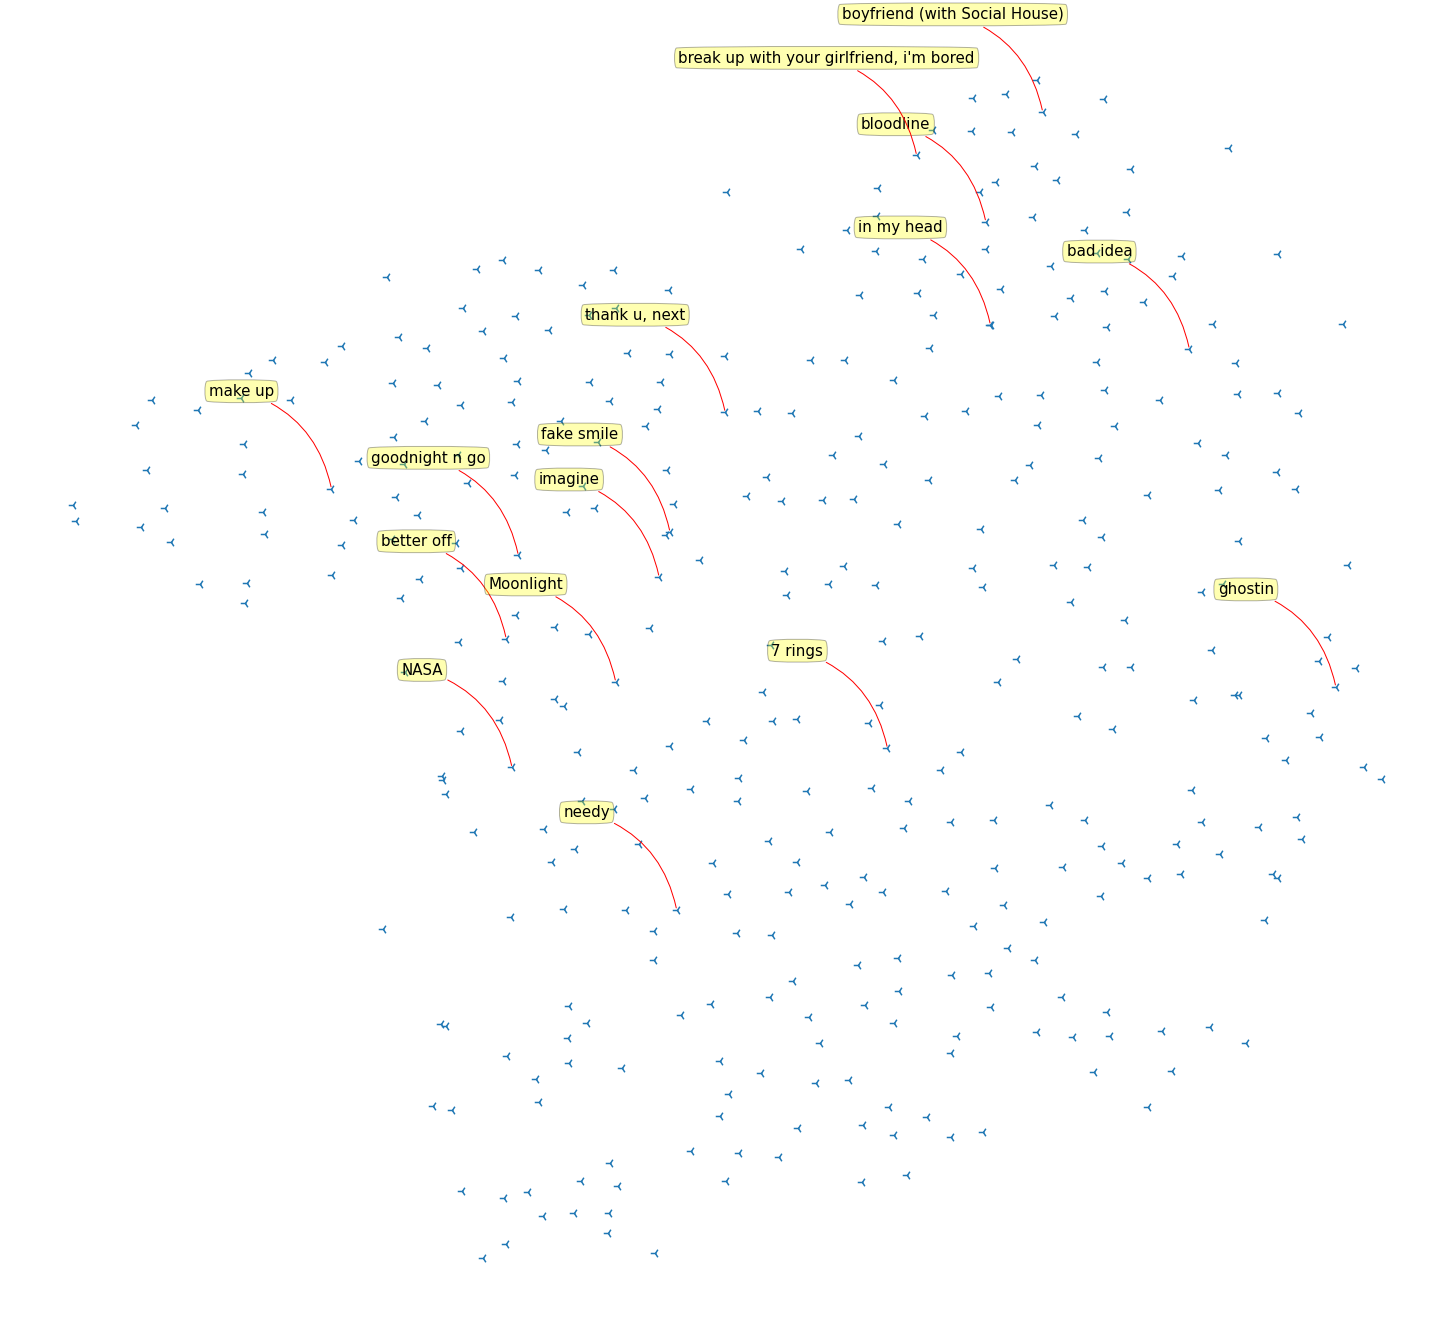

In [208]:
fig = figure(figsize=(20, 20))
ax = axes(frameon=False)         
setp(ax, xticks=(), yticks=())       
subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9, wspace=0.0, hspace=0.0)
scatter(X_embedded[:, 0], X_embedded[:, 1], s=90, marker="3") 

for row_id in range(0, len(df)):
    if (df.ARTIST[row_id] == 'Ariana Grande'):
        target_word = df.TITLE[row_id]
        xx = X_embedded[row_id, 0]
        yy = X_embedded[row_id, 1]
        plt.annotate(target_word, (xx,yy), size=15, xytext=(-90,90), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round4', fc='yellow', alpha=0.3),
            arrowprops=dict(arrowstyle='-', connectionstyle='arc3,rad=-0.3', 
                            color='red'))

The sparse scatter plot results from plotting Ariana Grande's songs aren't too surprising as her style of hip/hop and pop music incorporates both slower and less rhythmically exciting elements (songs like  NASA, 7 rings, goodnight n go), as well as sometimes more vibrant and upbeat songs such as boyfriend and break up with your girlfriend, i'm bored. The songs I have saved by her are all from her her thank u, next album released in 2019, in addition to her single, boyfriend (with Social House) released later that same year. 

Plotting one of my favourite Indie pop bands, Wet. I would describe their music as not too acoustic, more ambient melodies and instrumentals going along with their mellow song themes. 

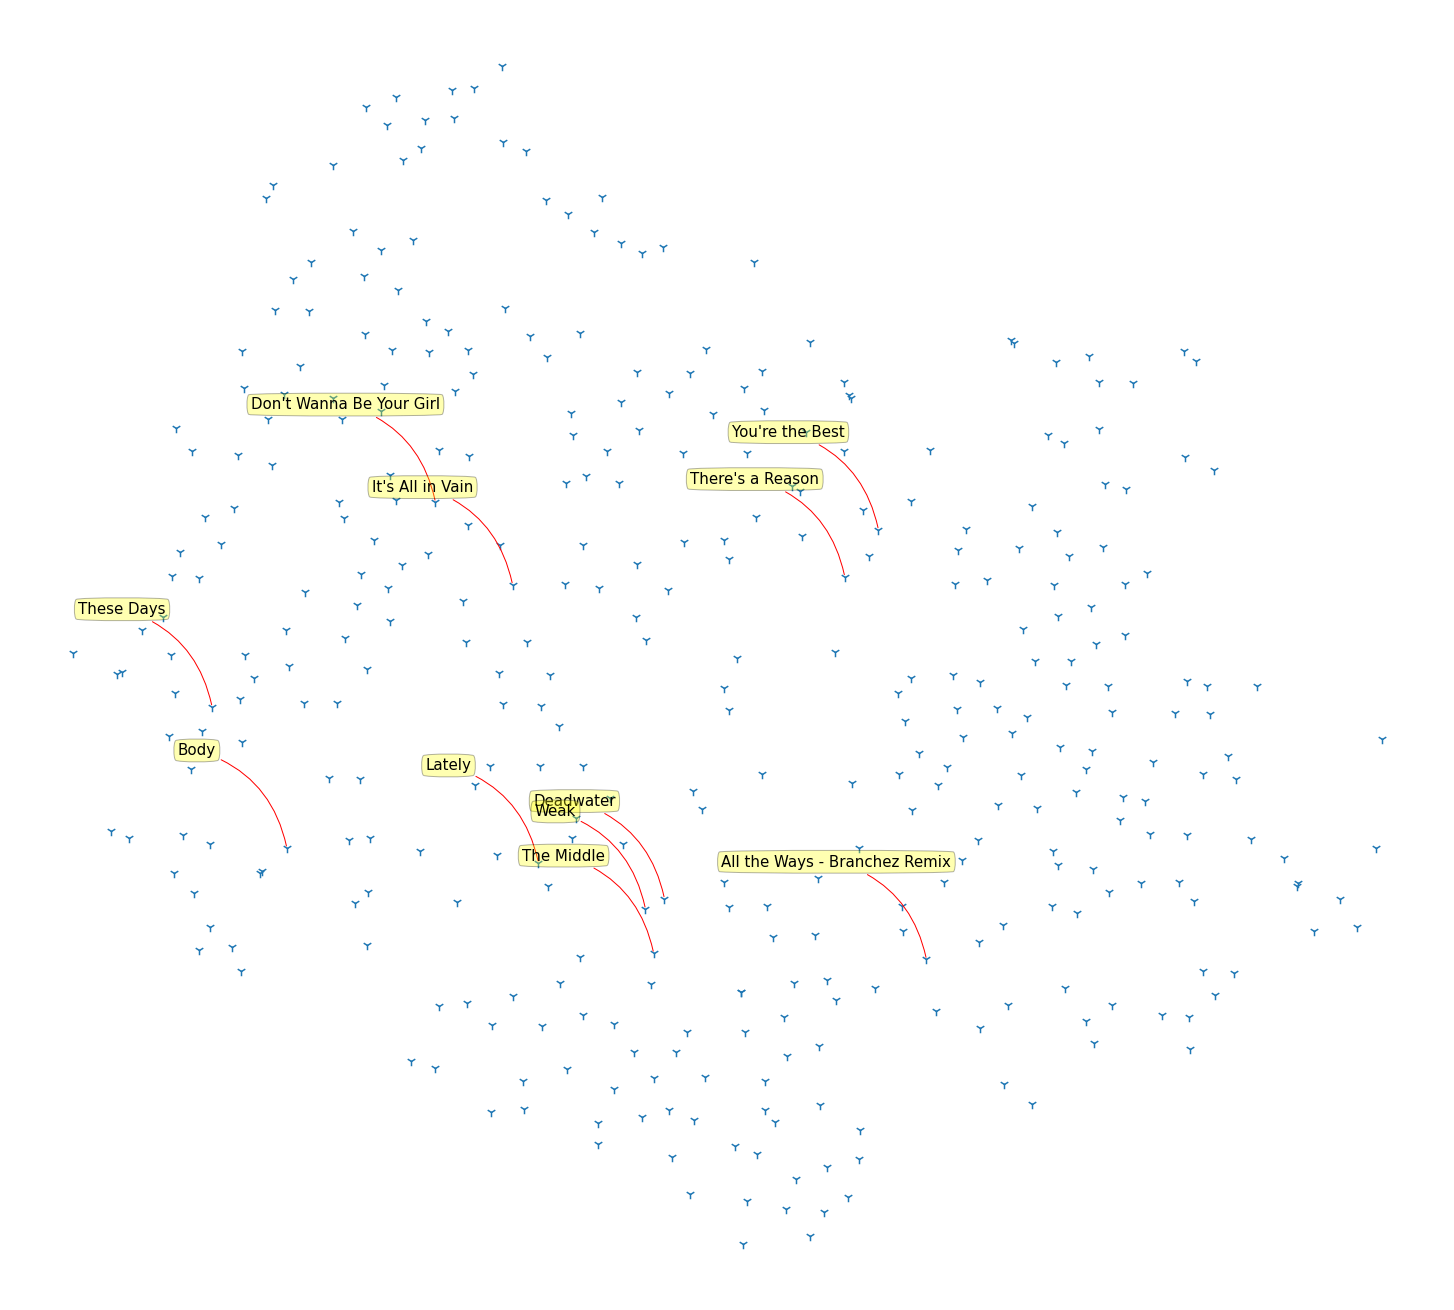

In [196]:
fig = figure(figsize=(20, 20))
ax = axes(frameon=False)         
setp(ax, xticks=(), yticks=())  
subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9, wspace=0.0, hspace=0.0)
scatter(X_embedded[:, 0], X_embedded[:, 1], s=90, marker="1") 

for row_id in range(0, len(df)):
    if (df.ARTIST[row_id] == 'Wet'):
        target_word = df.TITLE[row_id]
        xx = X_embedded[row_id, 0]
        yy = X_embedded[row_id, 1]
        plt.annotate(target_word, (xx,yy), size=15, xytext=(-90,90), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round4', fc='yellow', alpha=0.3),
            arrowprops=dict(arrowstyle='-', connectionstyle='arc3,rad=-0.3', 
                            color='red'))

Some outliers in this plot: You're the Best and There's a Reason are two higher energy and positive sounding songs, sonically pretty different from the cluster of more mellow songs.

### Future Project Extensions
Since this playlist was my "favourites" playlist, I did not have all of the songs by my favourite artists added into it, so possible extensions for the future could be to look at all of the songs by my favourite artists.

Principal Component Analysis
A different way to visualize higher dimension data: principal component analysis. Principal component analysis reduces the dimension through Singular Value Decomposition of the data to project it to a lower dimensional space, while preserving as much information as possible.

As an unsupervised learning algorithm, PCA attempts to learn about the relationship between the x and y values rather than predict the y values from the x values as in linear regression.

'''from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)
print(pca.explained_variance_ratio_) # how much variance can be explaiened by each 
'''
x_pca = pca.fit_transform(x) # fitting the mode with x and reducing the dimension

Main purpose of using One Class SVM, is novelty detection. The idea of novelty detection is to detect rare events, i.e. events that happen rarely, and you have very little samples of. The problem is then, that the usual way of training a classifier will not work.

So how do you decide what a novel pattern is?. Many approaches are based on the estimation of the density of probability for the data. Novelty corresponds to those samples where the density of probability is "very low". How low depends on the application.****